<a href="https://colab.research.google.com/github/D-Beall/MachineLearning/blob/master/TakeHomeQuiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a id="T1"></a>
# Task

1) Develop an estimated multiple linear regression equation with mbap as response variable and sscp & hscp as the two predictor variables. Interpret the regression coefficients and check whether they are significant based on the summary output.

---
2) Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better. 
    
    (i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.
    
    (ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables. 
---
3) Show the functional form of a multiple regression model. Build a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables. 
    
    Divide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. Show the model summary and interpret the p-values of the regression coefficients. 
    
    Remove any insignificant variables and rebuild the model. 
    
    Use this model for prediction on the test set and show the first few observations’ actual value of the test set in comparison to the predicted value.

<a id="T21"></a>
# Packages used

In [1]:
#Libraries used in the kernel

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # graphs potting 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, classification_report
from statsmodels.api import OLS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<a id="T22"></a>
# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataframe = pd.read_csv("./drive/My Drive/Machine Learning/Placement_Data_Full_Class.csv", index_col="sl_no")
dataframe.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#Make copies of dataframe
data_reg = dataframe.copy()
data_class = dataframe.copy()

<a id="T3"></a>
# Data Visualization

**This plot shows marks distribution in MBA score**

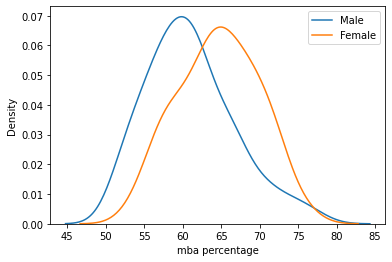

In [5]:
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="M"])
sns.kdeplot(dataframe.mba_p[ dataframe.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("mba percentage")
plt.show()

_average density plot shows Male has lower average score in MBA than Females.

**Correlation between different features**

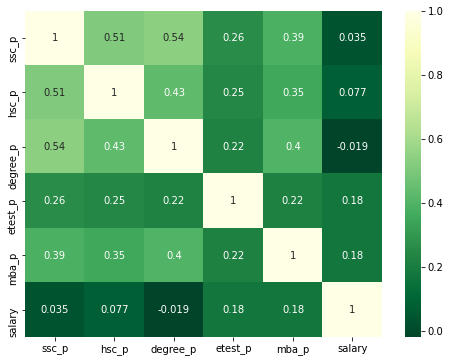

In [6]:
matrix = dataframe.corr()
plt.figure(figsize=(8,6))
#plot heat map
g=sns.heatmap(matrix,annot=True,cmap="YlGn_r")

_Senior secondary have a higher correlation with MBA score than Higher secondary score_

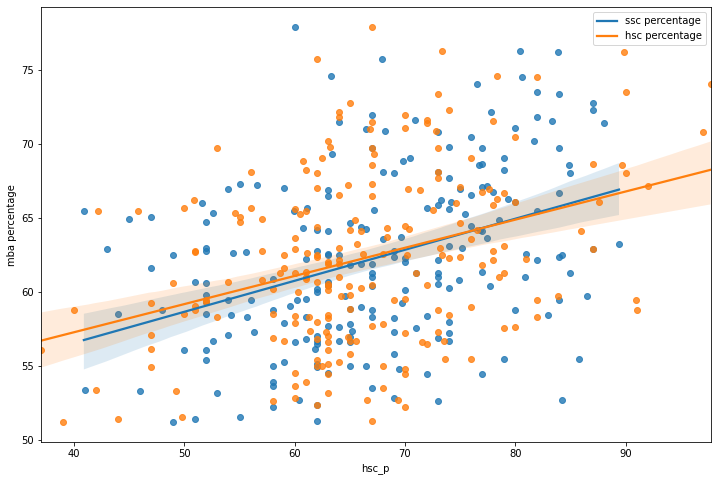

In [7]:
plt.figure(figsize=(12,8))
sns.regplot(x="ssc_p",y="mba_p",data=dataframe)
sns.regplot(x="hsc_p",y="mba_p",data=dataframe)
plt.legend(["ssc percentage", "hsc percentage"])
plt.ylabel("mba percentage")
plt.show()

_SSC percentage slightly weighs more for having good MBA score_

<a id="T4"></a>
# Task 1: Training regression model

1. **Develop an estimated multiple linear regression equation with mbap as response variable and sscp & hscp as the two predictor variables. Interpret the regression coefficients and check whether they are significant based on the summary output**

<a id="T41"></a>
# Pre processing data

In [8]:
# Seperating independent and dependent variables
#dependent variables ssc_p, hsc_p
X = data_class.iloc[:,[1,3]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

In [9]:
#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

<a id="T42"></a>
## Estimation by multiple regressor

In [10]:
#Multiple linear regression
#import library
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#train the model
regressor.fit(X_train, y_train)

#predict the test set(mba_p)
y_pred_m = regressor.predict(X_test)

In [11]:
#from sklearn.metrics import r2_score, classification_report
print("R2 score: " + str(r2_score(y_test, y_pred_m)))

R2 score: 0.1749591688855493


<a id="T43"></a>
## Interpreting regression coefficients

In [12]:
print(regressor.coef_)
print(regressor.intercept_)

[[0.13869167 0.13315395]]
[44.04616422]


The equation of our multiple linear regression model is:

$$\textrm{mba_p} = 0.14 \times \textrm{ssc_p} + 0.13 \times \textrm{hsc_p} + 44.05$$


<a id="T44"></a>
## Significant check based on OLS summary

* _The significance of a regression coefficient in a regression model is determined by dividing the estimated coefficient over the standard deviation of this estimate._
* _For statistical significance we expect the absolute value of the t-ratio to be greater than 2 or the_
* _P-value to be less than the significance level (α=0.01 or 0.05 or 0,1)._

In [13]:
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              5048.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   4.18e-152
Time:                        19:47:14   Log-Likelihood:                         -602.68
No. Observations:                 172   AIC:                                      1209.
Df Residuals:                     170   BIC:                                      1216.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5122      0.056      9.099      0.000       0.401       0.623
x2             0.4051      0.057      7.132      0.000       0.293       0.517
==============================================================================
Omnibus:                        1.329   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.101
Skew:                           0.193   Prob(JB):                        0.577
Kurtosis:                       3.066   Cond. No.                         12.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The regression model summary shows that the hsc and ssc predictor variables are statistically significant because their p-values equal 0.000.**

**My Thoughts**

Given the p-values of both variables used, both would be valuable to the model. As mentioned in the author's notes the p valeus are 0.000 which lie below the threshold of p=0.05. As for the coef of x1 and x2 those appear to be somewhat close. However it appears that the x2 variable has more of an inpact on x1 given the coef of x1 being larger.

<a id="T5"></a>
# Task 2: Training regression model

2. **Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better.** 
    
    (i) Use mbap as outcome variable and sscp & degreep as the two predictor variables.    

In [14]:
# Seperating independent and dependent variables
#dependent variables ssc_p, degree_p
X = data_class.iloc[:,[1,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict the dependent variable
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score: " + str(r2_score(y_test, y_pred_m)))
print("regression coeff: " + str(regressor.coef_))
print("regression intercept: " + str(regressor.intercept_))
print("mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66")

R2 score: 0.2670526417462228
regression coeff: [[0.1237819  0.21517005]]
regression intercept: [39.65800695]
mba_p = 0.12 x ssc_p + 0.22 x degree_p + 39.66


2. **Estimate a multiple regression equation for each of the below scenarios and based on the model’s R-square comment which model is better.** 
    
    (ii) Use mbap as outcome variable and hscp & degreep as the two predictor variables.

In [15]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_m = regressor.predict(X_test)

#from sklearn.metrics import r2_score, classification_report
print("R2 score:" + str(r2_score(y_test, y_pred_m)))
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.17616396722600414
regression coeff:[[0.13171318 0.22510365]]
regression intercept:[38.56332438]
mba_p = 0.13171318061863166 x hsc_p + 0.22510364524995355 x degree_p + 38.56332437694495


**My Thoughts**
The results of this task indicate that for predictor values sscp and degreep are more valuable than hscp and degreep. The sscp portion scored higher in the r2 score which indeciates a better predictor pair. Additionally their regression intercepts are fairly similar indicating a similar distance from the origin.

<a id='51'></a>
## model selection based on R2 score

> **Model with mbap as outcome variable and sscp & degreep as the two predictor variables is better since the r2_score is 0.267**

<a id="T6"></a>
# Task 3: Train a regression model

3) **Show the functional form of a multiple regression model. Build a regression model with mbap as dependent variable and sscp, hscp and degree_p as three independent variables.** 
    
    Divide the dataset in the ratio of 80:20 for train and test set (set seed as 1001) and use the train set to build the model. Show the model summary and interpret the p-values of the regression coefficients. 
    
    Remove any insignificant variables and rebuild the model. 
    
    Use this model for prediction on the test set and show the first few observations’ actual value of the test set in comparison to the predicted value.

**_functional form_**
> Multiple regression model with mba_p as dependent varialble and ssc_p, hsc_p and degree_p as three independent variables.

$$ mba_p = x_1.ssc_p + x_2.hsc_p + x_3.degree_p + constant $$

In [16]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[1,3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<a id="T61"></a>
## Insignificant variable based on OLS summary

* _The significance of a regression coefficient in a regression model is determined by dividing the estimated coefficient over the standard deviation of this estimate._
* _For statistical significance we expect the absolute value of the t-ratio to be greater than 2 or the_
* _P-value to be less than the significance level (α=0.01 or 0.05 or 0,1)._

In [17]:
#Summary of the model
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              4980.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   1.34e-164
Time:                        19:47:14   Log-Likelihood:                         -569.34
No. Observations:                 172   AIC:                                      1145.
Df Residuals:                     169   BIC:                                      1154.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1817      0.063      2.892      0.004       0.058       0.306
x2             0.1940      0.054      3.583      0.000       0.087       0.301
x3             0.5572      0.066      8.455      0.000       0.427       0.687
==============================================================================
Omnibus:                        3.046   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                3.043
Skew:                           0.284   Prob(JB):                        0.218
Kurtosis:                       2.681   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **The regression model summary shows that the hsc and degree predictor variables are statistically significant because their p-values equal 0.000.**

> **The x1 i.e. ssc variable has a p-value 0.004**

**_Drop the ssc feature_**

<a id="T62"></a>
## Retrain the model

In [18]:
# Seperating independent and dependent variables
X = data_class.iloc[:,[3,6]].values
y = data_class.iloc[:,-3].values.reshape(-1,1)

#splitting into training and test set
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1001)

#Multiple linear regression
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#predict the values
y_pred_m = regressor.predict(X_test)

In [20]:
#Summary of the model
#from statsmodels.api import OLS
summ=OLS(y_train,X_train).fit()
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.988
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              7155.
Date:                Fri, 23 Oct 2020   Prob (F-statistic):                   8.33e-165
Time:                        19:47:14   Log-Likelihood:                         -573.50
No. Observations:                 172   AIC:                                      1151.
Df Residuals:                     170   BIC:                                      1157.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.2537      0.051      4.963      0.000       0.153       0.355
x2             0.6804      0.051     13.245      0.000       0.579       0.782
==============================================================================
Omnibus:                        4.630   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.099   Jarque-Bera (JB):                3.431
Skew:                           0.212   Prob(JB):                        0.180
Kurtosis:                       2.453   Cond. No.                         13.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#from sklearn.metrics import r2_score, classification_report
#R2 score
print("R2 score:" + str(r2_score(y_test, y_pred_m)))

#model p values
print("regression coeff:" + str(regressor.coef_))
print("regression intercept:" + str(regressor.intercept_))
print("mba_p = " + str(regressor.coef_[0][0]) + " x hsc_p + " + str(regressor.coef_[0][1]) + " x degree_p + " + str(regressor.intercept_[0]))

R2 score:0.1883460640212925
regression coeff:[[0.14059098 0.2137894 ]]
regression intercept:[38.89461384]
mba_p = 0.14059098107062354 x hsc_p + 0.21378939519548953 x degree_p + 38.89461383778403


<a id="T63"></a>
## Observations true vs predicted

In [22]:
np.set_printoptions(precision=2)
dff = pd.DataFrame(list(zip(y_test, y_pred_m.round(2))),columns=("Target","Predicted"))
dff.head(8)

,Target,Predicted
0,[62.54],[62.23]
1,[70.81],[69.42]
2,[72.14],[61.62]
3,[69.7],[66.47]
4,[65.48],[57.92]
5,[61.31],[62.01]
6,[52.64],[59.02]
7,[57.65],[64.04]


**My Thougts**

In this task the author chose to eliminate the ssc variable because of its inferior p value. Even though in some instances a p value of less than 0.05 is considered signifigant the other values had a value of 0.00.

After the model was retrained the target and predicted results were given. These results show examples of the models predicted values compared to their actual ones. It appears that for some values the model did well with less than a 1.0 difference in prediction. However, greater issues occured with samples 2,4,7 with differences over 5.0 occuring. 